In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e2/sample_submission.csv
/kaggle/input/playground-series-s5e2/train.csv
/kaggle/input/playground-series-s5e2/test.csv
/kaggle/input/playground-series-s5e2/training_extra.csv


In [2]:
# load data
train_df = pd.read_csv("/kaggle/input/playground-series-s5e2/train.csv")
train_extra_df = pd.read_csv("/kaggle/input/playground-series-s5e2/training_extra.csv")
test_df = pd.read_csv("/kaggle/input/playground-series-s5e2/test.csv")
train_df = pd.concat([train_df, train_extra_df], axis=0, ignore_index=True)

In [3]:
# initial overview -- check dtypes, shape, number of NaNs, and range of values/weird min or max values
display(train_df.head(15).T, train_df.info(), train_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3994318 entries, 0 to 3994317
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Brand                 object 
 2   Material              object 
 3   Size                  object 
 4   Compartments          float64
 5   Laptop Compartment    object 
 6   Waterproof            object 
 7   Style                 object 
 8   Color                 object 
 9   Weight Capacity (kg)  float64
 10  Price                 float64
dtypes: float64(3), int64(1), object(7)
memory usage: 335.2+ MB


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Brand,Jansport,Jansport,Under Armour,Nike,Adidas,Nike,Nike,Puma,Under Armour,Under Armour,Nike,Nike,Adidas,Under Armour,Nike
Material,Leather,Canvas,Leather,Nylon,Canvas,Canvas,NaN,Canvas,Polyester,Nylon,Polyester,Polyester,Nylon,Leather,Polyester
Size,Medium,Small,Small,Small,Medium,Medium,Large,Small,Medium,Medium,Large,NaN,Medium,Medium,Small
Compartments,7.0,10.0,2.0,8.0,1.0,10.0,3.0,1.0,8.0,2.0,1.0,10.0,5.0,8.0,10.0
Laptop Compartment,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,Yes,No,No
Waterproof,No,Yes,No,No,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Yes
Style,Tote,Messenger,Messenger,Messenger,Messenger,NaN,Backpack,Backpack,Tote,Messenger,Backpack,NaN,Backpack,Tote,Tote
Color,Black,Green,Red,Green,Green,Black,Green,Blue,Gray,Pink,NaN,Gray,Blue,Red,Green
Weight Capacity (kg),11.611723,27.078537,16.64376,12.93722,17.749338,7.241812,6.828123,21.488864,10.20778,15.8951,27.806951,13.697554,15.87205,26.079409,14.744147


None

,id,Compartments,Weight Capacity (kg),Price
count,3.994318e+06,3.994318e+06,3.992510e+06,3.994318e+06
mean,2.182137e+06,5.434740e+00,1.801042e+01,8.136217e+01
std,1.178058e+06,2.893043e+00,6.973969e+00,3.893868e+01
min,0.000000e+00,1.000000e+00,5.000000e+00,1.500000e+01
25%,1.198579e+06,3.000000e+00,1.206896e+01,4.747002e+01
50%,2.197158e+06,5.000000e+00,1.805436e+01,8.098495e+01
75%,3.195738e+06,8.000000e+00,2.398751e+01,1.148550e+02
max,4.194317e+06,1.000000e+01,3.000000e+01,1.500000e+02


In [4]:
# deal with numeric columns' missing values
numeric = train_df.drop(columns=["id", "Price"]).select_dtypes(include=['number']).columns
train_df[numeric] = train_df[numeric].fillna(train_df[numeric].mean())
test_df[numeric] = test_df[numeric].fillna(test_df[numeric].mean())
display(train_df.isnull().sum(), test_df.isnull().sum())

id                           0
Brand                   126758
Material                110962
Size                     87785
Compartments                 0
Laptop Compartment       98533
Waterproof               94324
Style                   104180
Color                   133617
Weight Capacity (kg)         0
Price                        0
dtype: int64

id                         0
Brand                   6227
Material                5613
Size                    4381
Compartments               0
Laptop Compartment      4962
Waterproof              4811
Style                   5153
Color                   6785
Weight Capacity (kg)       0
dtype: int64

<Figure size 1500x3500 with 0 Axes>

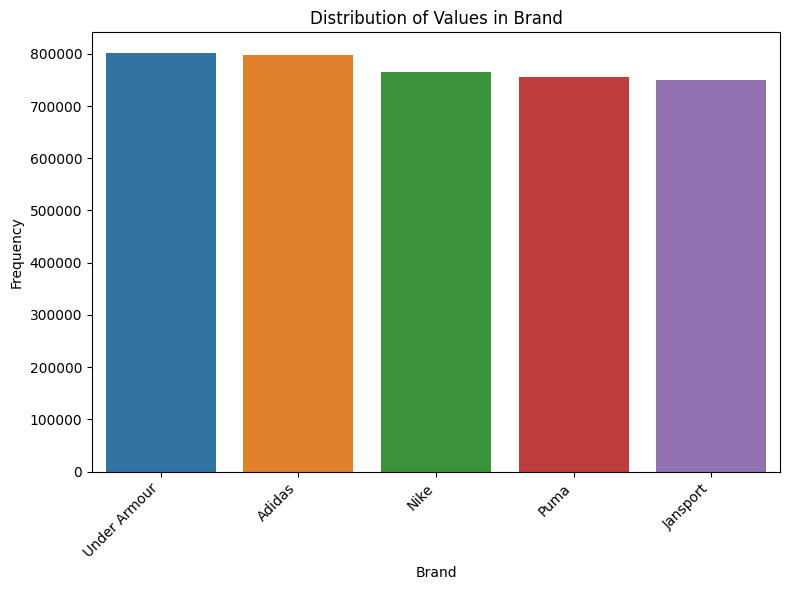

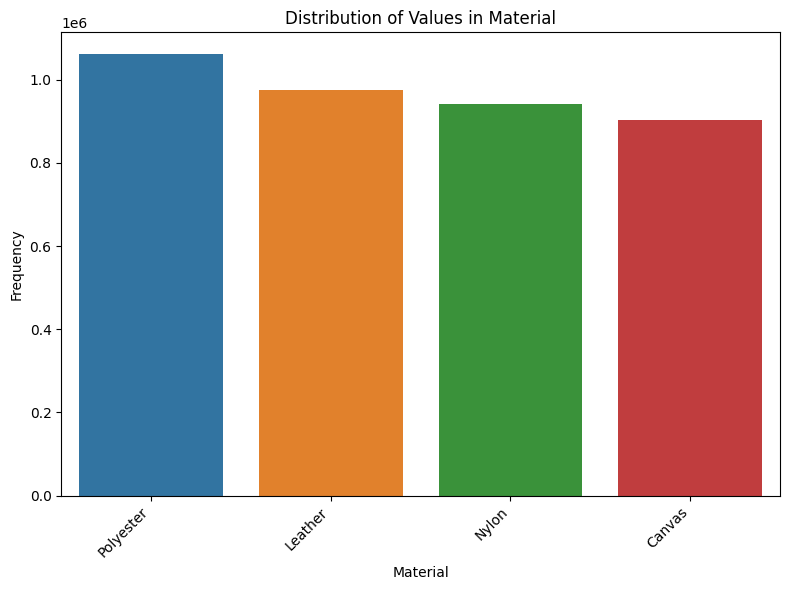

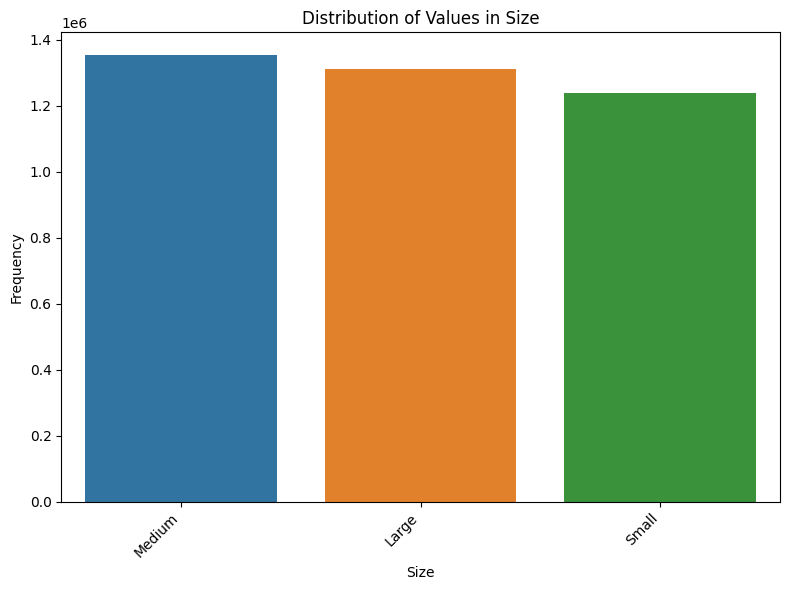

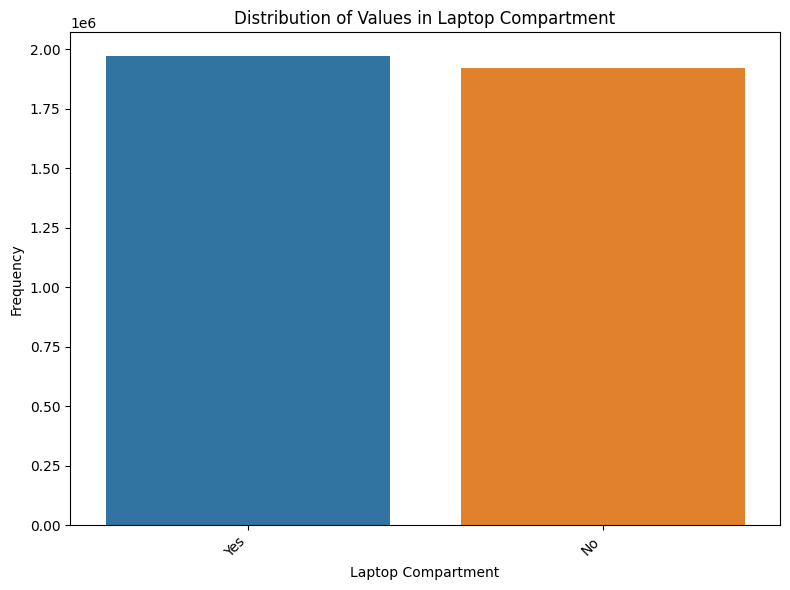

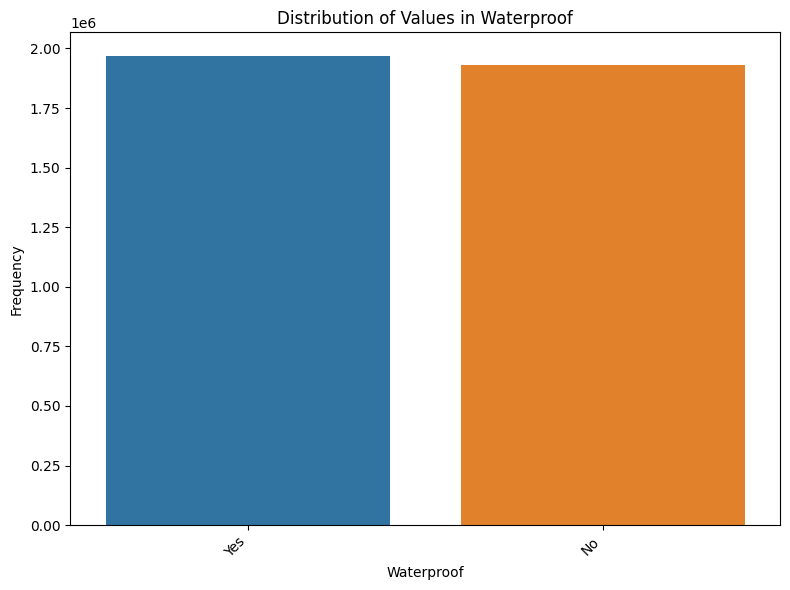

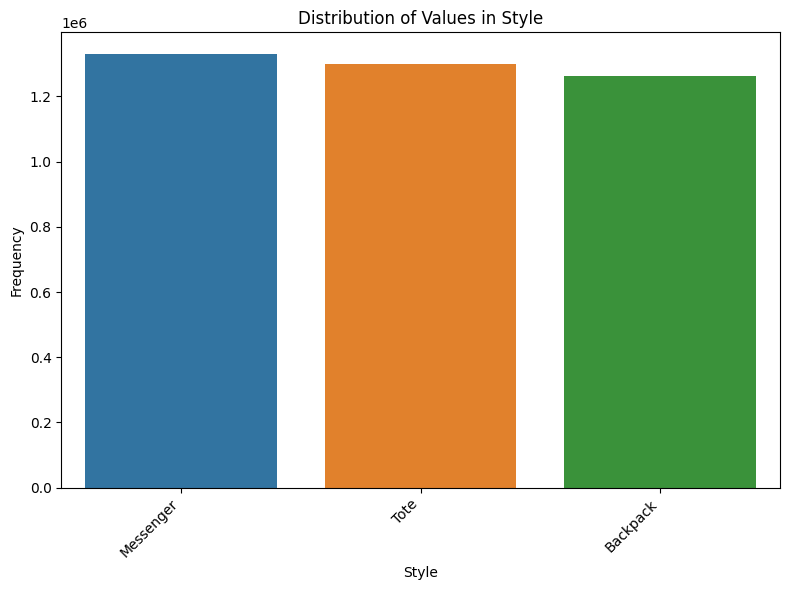

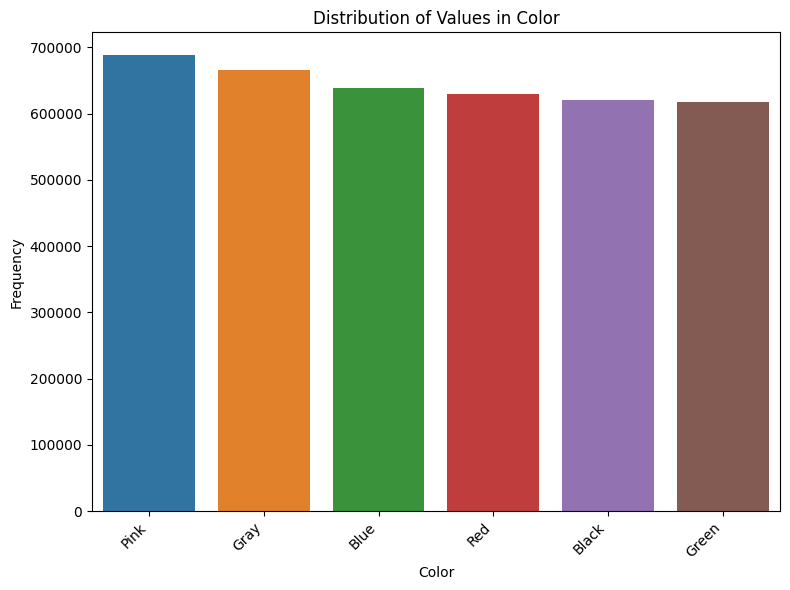

In [5]:
# view the distribution of values in each object column
import seaborn as sns
import matplotlib.pyplot as plt
categorical = train_df.select_dtypes(include='object').columns
plt.figure(figsize=(15, len(categorical) * 5))
for c in categorical:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=c, data=train_df, order=train_df[c].value_counts().index)
    plt.title(f'Distribution of Values in {c}')
    plt.xlabel(c)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [6]:
# deal with object columns' missing values, using Random Imputer for more accurate imputation
# just using something such as the mode would ruin the balance already present
from sklearn.preprocessing import LabelEncoder

def process_data_with_distribution_imputer(train_df, test_df, cat_columns):
    """
    Process categorical data by:
    1. Encoding non-null values
    2. Imputing missing values based on observed distributions
    """
    # encoders
    label_encoders = {col: LabelEncoder() for col in cat_columns}
    
    # copies for processing
    train_processed = train_df.copy()
    test_processed = test_df.copy()
    
    for col in cat_columns:
        # fit encoder on non-null training values
        label_encoders[col].fit(train_df[col].dropna())
        
        # value distribution from training data
        train_dist = train_df[col].value_counts(normalize=True)
        
        # process training data
        # encode non-null values
        train_processed.loc[train_df[col].notna(), col] = label_encoders[col].transform(
            train_df[col][train_df[col].notna()]
        )
        
        # impute missing values based on distribution
        missing_train = train_df[col].isna()
        if missing_train.any():
            train_processed.loc[missing_train, col] = np.random.choice(
                label_encoders[col].transform(train_dist.index),
                size=missing_train.sum(),
                p=train_dist.values
            )
            
        # process test data
        # encode non-null values
        test_processed.loc[test_df[col].notna(), col] = label_encoders[col].transform(
            test_df[col][test_df[col].notna()]
        )
        
        # impute missing values based on training distribution
        missing_test = test_df[col].isna()
        if missing_test.any():
            test_processed.loc[missing_test, col] = np.random.choice(
                label_encoders[col].transform(train_dist.index),
                size=missing_test.sum(),
                p=train_dist.values
            )
    
    return train_processed, test_processed, label_encoders

In [7]:
display(train_df.head(15).T, test_df.head(15).T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Brand,Jansport,Jansport,Under Armour,Nike,Adidas,Nike,Nike,Puma,Under Armour,Under Armour,Nike,Nike,Adidas,Under Armour,Nike
Material,Leather,Canvas,Leather,Nylon,Canvas,Canvas,NaN,Canvas,Polyester,Nylon,Polyester,Polyester,Nylon,Leather,Polyester
Size,Medium,Small,Small,Small,Medium,Medium,Large,Small,Medium,Medium,Large,NaN,Medium,Medium,Small
Compartments,7.0,10.0,2.0,8.0,1.0,10.0,3.0,1.0,8.0,2.0,1.0,10.0,5.0,8.0,10.0
Laptop Compartment,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,Yes,No,No
Waterproof,No,Yes,No,No,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Yes
Style,Tote,Messenger,Messenger,Messenger,Messenger,NaN,Backpack,Backpack,Tote,Messenger,Backpack,NaN,Backpack,Tote,Tote
Color,Black,Green,Red,Green,Green,Black,Green,Blue,Gray,Pink,NaN,Gray,Blue,Red,Green
Weight Capacity (kg),11.611723,27.078537,16.64376,12.93722,17.749338,7.241812,6.828123,21.488864,10.20778,15.8951,27.806951,13.697554,15.87205,26.079409,14.744147


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
id,300000,300001,300002,300003,300004,300005,300006,300007,300008,300009,300010,300011,300012,300013,300014
Brand,Puma,Nike,Adidas,Adidas,NaN,Under Armour,Nike,Jansport,Nike,Puma,Adidas,Jansport,Puma,Under Armour,Nike
Material,Leather,Canvas,Canvas,Nylon,Nylon,Nylon,Nylon,Polyester,Canvas,Leather,Nylon,Leather,Leather,Leather,Leather
Size,Small,Medium,Large,Large,Large,Medium,Large,Medium,Large,Large,Small,Small,Large,Medium,Medium
Compartments,2.0,7.0,9.0,1.0,2.0,8.0,8.0,6.0,8.0,1.0,1.0,9.0,5.0,1.0,5.0
Laptop Compartment,No,No,No,Yes,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes
Waterproof,No,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,Yes,No,No,No
Style,Tote,Backpack,Messenger,Messenger,Tote,Backpack,Tote,Backpack,Backpack,Tote,Tote,Backpack,Messenger,Messenger,Messenger
Color,Green,Green,Blue,Green,Black,Black,Blue,Blue,Red,Blue,Pink,Red,Blue,Green,Pink
Weight Capacity (kg),20.671147,13.564105,11.809799,18.477036,9.907953,17.547673,16.003025,24.238091,19.181167,9.937962,13.585978,14.051959,14.98751,19.543316,25.03124


In [8]:
# run imputing function to properly handle NaNs in categorical features
cat_columns = ['Brand', 'Material', 'Size', 'Laptop Compartment', 
               'Waterproof', 'Style', 'Color']

train_processed, test_processed, label_encoders = process_data_with_distribution_imputer(
    train_df=train_df,
    test_df=test_df,
    cat_columns=cat_columns
)

# make sure relative balance of unique values was preserved
for c in categorical:
    print(f"\nColumn: {c}")
    print("Original value counts:")
    print(train_df[c].value_counts(normalize=True).head())
    print("\nImputed value counts:")
    print(train_processed[c].value_counts(normalize=True).head())


Column: Brand
Original value counts:
Brand
Under Armour    0.207116
Adidas          0.206073
Nike            0.197646
Puma            0.195415
Jansport        0.193750
Name: proportion, dtype: float64

Imputed value counts:
Brand
4    0.207117
0    0.206052
2    0.197661
3    0.195451
1    0.193718
Name: proportion, dtype: float64

Column: Material
Original value counts:
Material
Polyester    0.273187
Leather      0.251377
Nylon        0.242743
Canvas       0.232694
Name: proportion, dtype: float64

Imputed value counts:
Material
3    0.273211
1    0.251339
2    0.242705
0    0.232746
Name: proportion, dtype: float64

Column: Size
Original value counts:
Size
Medium    0.346724
Large     0.335923
Small     0.317353
Name: proportion, dtype: float64

Imputed value counts:
Size
1    0.346734
0    0.335914
2    0.317352
Name: proportion, dtype: float64

Column: Laptop Compartment
Original value counts:
Laptop Compartment
Yes    0.506429
No     0.493571
Name: proportion, dtype: float64

Imp

In [9]:
# convert back to strings
for col in cat_columns:
    train_processed[col] = label_encoders[col].inverse_transform(train_processed[col].astype(int))
    test_processed[col] = label_encoders[col].inverse_transform(test_processed[col].astype(int))

In [10]:
display(train_processed.head(15).T, test_processed.head(15).T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Brand,Jansport,Jansport,Under Armour,Nike,Adidas,Nike,Nike,Puma,Under Armour,Under Armour,Nike,Nike,Adidas,Under Armour,Nike
Material,Leather,Canvas,Leather,Nylon,Canvas,Canvas,Canvas,Canvas,Polyester,Nylon,Polyester,Polyester,Nylon,Leather,Polyester
Size,Medium,Small,Small,Small,Medium,Medium,Large,Small,Medium,Medium,Large,Large,Medium,Medium,Small
Compartments,7.0,10.0,2.0,8.0,1.0,10.0,3.0,1.0,8.0,2.0,1.0,10.0,5.0,8.0,10.0
Laptop Compartment,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,Yes,No,No
Waterproof,No,Yes,No,No,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Yes
Style,Tote,Messenger,Messenger,Messenger,Messenger,Tote,Backpack,Backpack,Tote,Messenger,Backpack,Backpack,Backpack,Tote,Tote
Color,Black,Green,Red,Green,Green,Black,Green,Blue,Gray,Pink,Red,Gray,Blue,Red,Green
Weight Capacity (kg),11.611723,27.078537,16.64376,12.93722,17.749338,7.241812,6.828123,21.488864,10.20778,15.8951,27.806951,13.697554,15.87205,26.079409,14.744147


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
id,300000,300001,300002,300003,300004,300005,300006,300007,300008,300009,300010,300011,300012,300013,300014
Brand,Puma,Nike,Adidas,Adidas,Puma,Under Armour,Nike,Jansport,Nike,Puma,Adidas,Jansport,Puma,Under Armour,Nike
Material,Leather,Canvas,Canvas,Nylon,Nylon,Nylon,Nylon,Polyester,Canvas,Leather,Nylon,Leather,Leather,Leather,Leather
Size,Small,Medium,Large,Large,Large,Medium,Large,Medium,Large,Large,Small,Small,Large,Medium,Medium
Compartments,2.0,7.0,9.0,1.0,2.0,8.0,8.0,6.0,8.0,1.0,1.0,9.0,5.0,1.0,5.0
Laptop Compartment,No,No,No,Yes,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes
Waterproof,No,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,Yes,No,No,No
Style,Tote,Backpack,Messenger,Messenger,Tote,Backpack,Tote,Backpack,Backpack,Tote,Tote,Backpack,Messenger,Messenger,Messenger
Color,Green,Green,Blue,Green,Black,Black,Blue,Blue,Red,Blue,Pink,Red,Blue,Green,Pink
Weight Capacity (kg),20.671147,13.564105,11.809799,18.477036,9.907953,17.547673,16.003025,24.238091,19.181167,9.937962,13.585978,14.051959,14.98751,19.543316,25.03124


In [11]:
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold

def fit_engineer_backpack_features(train_df, test_df=None, target_col='Price', random_state=42):
    """
    Engineer features for price prediction.
    If test_df is provided, applies the same transformations learned from train_df.
    """
    # copy to avoid modifying original
    train_engineered = train_df.copy()
    test_engineered = test_df.copy() if test_df is not None else None
    encoders = {}
    
    # categorical combinations
    for df in [train_engineered, test_engineered]:
        if df is not None:
            df['Material_Size'] = df['Material'] + '_' + df['Size']
            df['Brand_Style'] = df['Brand'] + '_' + df['Style']
    
    # binary features
    for df in [train_engineered, test_engineered]:
        if df is not None:
            df['Has_Laptop_Compartment'] = (df['Laptop Compartment'] == 'Yes').astype(int)
            df['Is_Waterproof'] = (df['Waterproof'] == 'Yes').astype(int)
            df['Capacity_per_Compartment'] = df['Weight Capacity (kg)'] / df['Compartments']
    
    # size-based groupings
    size_map = {'Small': 1, 'Medium': 2, 'Large': 3}
    for df in [train_engineered, test_engineered]:
        if df is not None:
            df['Size_Numeric'] = df['Size'].map(size_map)
    
    # material quality tiers
    material_tiers = {
        'Canvas': 1,
        'Polyester': 2,
        'Nylon': 3,
        'Leather': 4
    }
    for df in [train_engineered, test_engineered]:
        if df is not None:
            df['Material_Tier'] = df['Material'].map(material_tiers)
    
    # brand-based statistics
    weight_stats = train_engineered.groupby('Brand')['Weight Capacity (kg)'].agg(['mean', 'std']).fillna(0)
    weight_stats.columns = ['Brand_Weight_mean', 'Brand_Weight_std']
    
    if target_col in train_engineered.columns:
        price_stats = train_engineered.groupby('Brand')[target_col].agg(['mean', 'median', 'std']).fillna(0)
        price_stats.columns = ['Brand_Price_mean', 'Brand_Price_median', 'Brand_Price_std']
        brand_stats = pd.concat([weight_stats, price_stats], axis=1)
    else:
        brand_stats = weight_stats
    
    # merge stats to both dataframes
    for df in [train_engineered, test_engineered]:
        if df is not None:
            df = df.merge(brand_stats, left_on='Brand', right_index=True, how='left')
    
    # style statistics if target column exists
    if target_col in train_engineered.columns:
        style_stats = train_engineered.groupby('Style')[target_col].agg(['mean', 'median', 'std']).fillna(0)
        style_stats.columns = ['Style_Price_mean', 'Style_Price_median', 'Style_Price_std']
        
        for df in [train_engineered, test_engineered]:
            if df is not None:
                df = df.merge(style_stats, left_on='Style', right_index=True, how='left')
    
    # material statistics if target column exists
    if target_col in train_engineered.columns:
        material_stats = train_engineered.groupby('Material')[target_col].agg(['mean', 'median', 'std']).fillna(0)
        material_stats.columns = ['Material_Price_mean', 'Material_Price_median', 'Material_Price_std']
        
        for df in [train_engineered, test_engineered]:
            if df is not None:
                df = df.merge(material_stats, left_on='Material', right_index=True, how='left')
    
    # handle categorical encoding
    # target encoding for high-cardinality features if target exists
    target_encode_cols = ['Brand', 'Material', 'Color', 'Brand_Style', 'Material_Size']
    
    if target_col in train_engineered.columns:
        for c in target_encode_cols:
            encoders[f'{c}_target'] = TargetEncoder(
                cols=[c],
                min_samples_leaf=1,
                smoothing=10,
                handle_missing='value',
                handle_unknown='value',
            )
            # fit on train
            encoders[f'{c}_target'].fit(train_engineered[[c]], train_engineered[target_col])
            
            # transform train and test
            train_engineered[f'{c}_encoded'] = encoders[f'{c}_target'].transform(train_engineered[[c]])
            if test_engineered is not None:
                test_engineered[f'{c}_encoded'] = encoders[f'{c}_target'].transform(test_engineered[[c]])
    
    # label encoding for low-cardinality features
    label_encode_cols = ['Size', 'Style']
    
    for c in label_encode_cols:
        encoders[f'{c}_label'] = LabelEncoder()
        # fit on train
        encoders[f'{c}_label'].fit(train_engineered[c])
        
        # transform train and test
        train_engineered[f'{c}_encoded'] = encoders[f'{c}_label'].transform(train_engineered[c])
        if test_engineered is not None:
            test_engineered[f'{c}_encoded'] = encoders[f'{c}_label'].transform(test_engineered[c])
    
    # interaction features
    for df in [train_engineered, test_engineered]:
        if df is not None:
            df['Capacity_Size_Interaction'] = df['Weight Capacity (kg)'] * df['Size_Numeric']
            df['Material_Capacity_Interaction'] = df['Material_Tier'] * df['Weight Capacity (kg)']
    
    if test_engineered is not None:
        return train_engineered, test_engineered, encoders
    else:
        return train_engineered, encoders

In [12]:
# create new features on train and test dataframes
train_engineered, test_engineered, encoders = fit_engineer_backpack_features(
    train_df=train_processed,
    test_df=test_processed,
    target_col='Price'
)

In [13]:
display(train_engineered.info(), test_engineered.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3994318 entries, 0 to 3994317
Data columns (total 27 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   id                             int64  
 1   Brand                          object 
 2   Material                       object 
 3   Size                           object 
 4   Compartments                   float64
 5   Laptop Compartment             object 
 6   Waterproof                     object 
 7   Style                          object 
 8   Color                          object 
 9   Weight Capacity (kg)           float64
 10  Price                          float64
 11  Material_Size                  object 
 12  Brand_Style                    object 
 13  Has_Laptop_Compartment         int64  
 14  Is_Waterproof                  int64  
 15  Capacity_per_Compartment       float64
 16  Size_Numeric                   int64  
 17  Material_Tier                  int64  
 18  Br

None

None

In [14]:
# make sure data is in the right format
# use Optuna to find optimal hyperparams
import optuna
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

def prepare_data_for_xgb(df_engineered, modeling_features):
    """
    Prepare data for XGBoost by ensuring all features are numeric.
    """
    # copy to avoid modifying the original
    df_processed = df_engineered[modeling_features].copy()
    
    # check for object columns
    object_columns = df_processed.select_dtypes(include=['object']).columns
    if len(object_columns) > 0:
        raise ValueError(f"Found object columns that need to be encoded: {object_columns}")
    
    return df_processed

def objective(trial, X_train, X_valid, y_train, y_valid):
    """
    Optuna objective function for XGBoost optimization.
    """
    param = {
        'device': 'cuda',  # use GPU
        'tree_method': 'hist',  # GPU accelerated histogram algorithm
        
        # parameters to optimize
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 7),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 1e-8, 1.0, log=True),
        'lambda': trial.suggest_float('lambda', 1e-8, 1.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-8, 1.0, log=True),
        
        # fixed parameters
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'random_state': 42
    }
    
    # DMatrix for XGBoost
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dvalid = xgb.DMatrix(X_valid, label=y_valid)
    
    # train with early stopping
    evals = [(dtrain, 'train'), (dvalid, 'valid')]
    model = xgb.train(
        param,
        dtrain,
        num_boost_round=10000,
        evals=evals,
        early_stopping_rounds=50,
        verbose_eval=False
    )
    
    # predict and evaluate
    preds = model.predict(dvalid)
    rmse = np.sqrt(mean_squared_error(y_valid, preds))
    
    return rmse

In [15]:
def optimize_xgb(X, y, n_trials=100):
    """
    Optimize XGBoost hyperparameters using Optuna.
    """
    # split data
    X_train, X_valid, y_train, y_valid = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # create study object
    study = optuna.create_study(
        direction='minimize',
        sampler=optuna.samplers.TPESampler(seed=42)
    )
    
    # optimize
    study.optimize(
        lambda trial: objective(trial, X_train, X_valid, y_train, y_valid),
        n_trials=n_trials,
        n_jobs=1  # 1 for GPU to avoid conflicts
    )
    
    return study.best_params, study

In [16]:
def train_final_model(X_train, y_train, X_valid, y_valid, best_params):
    """
    Train final XGBoost model with best parameters.
    """
    # add fixed parameters
    final_params = {
        **best_params,
        'device': 'cuda',
        'tree_method': 'hist',
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'random_state': 42
    }
    
    # DMatrix
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dvalid = xgb.DMatrix(X_valid, label=y_valid)
    
    # train final model
    evals = [(dtrain, 'train'), (dvalid, 'valid')]
    model = xgb.train(
        final_params,
        dtrain,
        num_boost_round=10000,
        evals=evals,
        early_stopping_rounds=50,
        verbose_eval=100
    )
    
    # evaluate
    train_preds = model.predict(dtrain)
    valid_preds = model.predict(dvalid)
    
    metrics = {
        'train_rmse': np.sqrt(mean_squared_error(y_train, train_preds)),
        'valid_rmse': np.sqrt(mean_squared_error(y_valid, valid_preds)),
        'train_r2': r2_score(y_train, train_preds),
        'valid_r2': r2_score(y_valid, valid_preds)
    }
    
    return model, metrics

In [18]:
modeling_features = [
    # numeric features
    'Compartments', 'Weight Capacity (kg)',
    'Capacity_per_Compartment', 'Size_Numeric', 'Material_Tier',
    
    # binary features
    'Has_Laptop_Compartment', 'Is_Waterproof',
    
    # target encoded features
    'Brand_encoded', 'Material_encoded', 'Color_encoded',
    'Brand_Style_encoded', 'Material_Size_encoded',
    
    # label encoded features
    'Size_encoded', 'Style_encoded',
    
    # interaction features
    'Capacity_Size_Interaction', 'Material_Capacity_Interaction'
]

# prepare data for XGBoost
X = prepare_data_for_xgb(train_engineered, modeling_features)
y = train_engineered['Price']

# optimize hyperparameters
best_params, study = optimize_xgb(X, y, n_trials=100)

[I 2025-02-19 14:29:56,302] A new study created in memory with name: no-name-c66cf061-5d6a-4f04-991b-191d554d7e81
[I 2025-02-19 14:30:06,349] Trial 0 finished with value: 38.89579140767967 and parameters: {'learning_rate': 0.03574712922600244, 'max_depth': 12, 'min_child_weight': 6, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'gamma': 1.7699302940633311e-07, 'lambda': 2.9152036385288193e-08, 'alpha': 0.08499808989182997}. Best is trial 0 with value: 38.89579140767967.
[I 2025-02-19 14:30:12,230] Trial 1 finished with value: 38.89441127982192 and parameters: {'learning_rate': 0.07725378389307355, 'max_depth': 10, 'min_child_weight': 1, 'subsample': 0.9879639408647978, 'colsample_bytree': 0.9329770563201687, 'gamma': 4.997040685255803e-07, 'lambda': 2.8483918709107956e-07, 'alpha': 2.9324868872723725e-07}. Best is trial 1 with value: 38.89441127982192.
[I 2025-02-19 14:30:22,290] Trial 2 finished with value: 38.87804754540584 and parameters: {'learning_rate':

In [21]:
# best parameters found by Optuna
# hardcoded now becuase Optuna took a very long time to run trials
best_params = {
    'learning_rate': 0.018046432068412444, 
    'max_depth': 4, 
    'min_child_weight': 7, 
    'subsample': 0.8671407998973113, 
    'colsample_bytree': 0.9452379423473304, 
    'gamma': 0.0075721601186984795, 
    'lambda': 0.1216874945507346, 
    'alpha': 4.787701508000442e-07
}

# train/validation split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# train final model
model, metrics = train_final_model(X_train, y_train, X_valid, y_valid, best_params)

[0]	train-rmse:38.94347	valid-rmse:38.91476
[100]	train-rmse:38.91315	valid-rmse:38.88692
[200]	train-rmse:38.90699	valid-rmse:38.88247
[300]	train-rmse:38.90352	valid-rmse:38.88020
[400]	train-rmse:38.90073	valid-rmse:38.87862
[500]	train-rmse:38.89846	valid-rmse:38.87767
[600]	train-rmse:38.89644	valid-rmse:38.87686
[700]	train-rmse:38.89469	valid-rmse:38.87635
[800]	train-rmse:38.89303	valid-rmse:38.87584
[900]	train-rmse:38.89150	valid-rmse:38.87560
[1000]	train-rmse:38.89007	valid-rmse:38.87534
[1100]	train-rmse:38.88875	valid-rmse:38.87517
[1200]	train-rmse:38.88742	valid-rmse:38.87494
[1300]	train-rmse:38.88612	valid-rmse:38.87486
[1371]	train-rmse:38.88528	valid-rmse:38.87483


In [23]:
print("Model performance:", metrics)

# optimization history
optuna.visualization.plot_optimization_history(study)

Model performance: {'train_rmse': 38.88527770423007, 'valid_rmse': 38.87482567728901, 'train_r2': 0.0030353258908187852, 'valid_r2': 0.002098477213490435}


In [24]:
# need to run Optuna to do this
optuna.visualization.plot_param_importances(study)

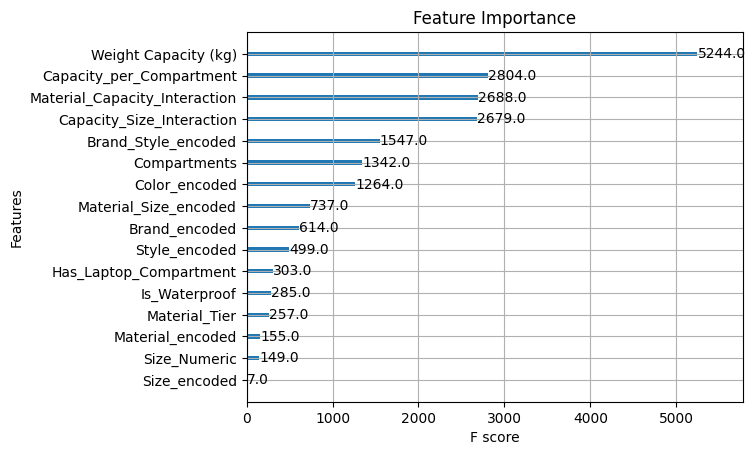

In [25]:
from xgboost import plot_importance
plot_importance(model)
plt.title('Feature Importance')
plt.show()

In [26]:
def make_predictions(model, X_test):
    """
    Make predictions using the trained model.
    """
    dtest = xgb.DMatrix(X_test)
    predictions = model.predict(dtest)
    return predictions

In [32]:
# predictions
predictions = make_predictions(model, test_engineered[modeling_features])
print("\nPrediction Statistics:")
print(pd.Series(predictions).describe())


Prediction Statistics:
count    200000.000000
mean         81.355682
std           1.767810
min          61.868248
25%          80.317173
50%          81.461266
75%          82.525805
max          87.673134
dtype: float64


In [33]:
sample_sub = pd.read_csv("/kaggle/input/playground-series-s5e2/sample_submission.csv")
sample_sub

,id,Price
0,300000,81.411
1,300001,81.411
2,300002,81.411
3,300003,81.411
4,300004,81.411
...,...,...
199995,499995,81.411
199996,499996,81.411
199997,499997,81.411
199998,499998,81.411


In [34]:
# Create submission DataFrame
submission = pd.DataFrame({
    'id': test_df['id'],
    'Price': predictions
})

submission

,id,Price
0,300000,80.802078
1,300001,82.936211
2,300002,82.261597
3,300003,81.450630
4,300004,78.818619
...,...,...
199995,499995,80.212982
199996,499996,73.798599
199997,499997,82.753540
199998,499998,82.009712


In [36]:
# Save predictions
submission.to_csv('predictions.csv', index=False)